**Epsilon-Greedy**

---


I Implemented a function that takes the number of arms, reward distributions, and steps as input and use epsilon-greedy strategy to choose an arm and pull it for rewards.Output the total reward accumulated over the specified steps.
Experiment with different epsilon values of 0,0.01,0.1 and 0.5 to analyze the trade-off between exploration and exploitation.and finally visuallized it

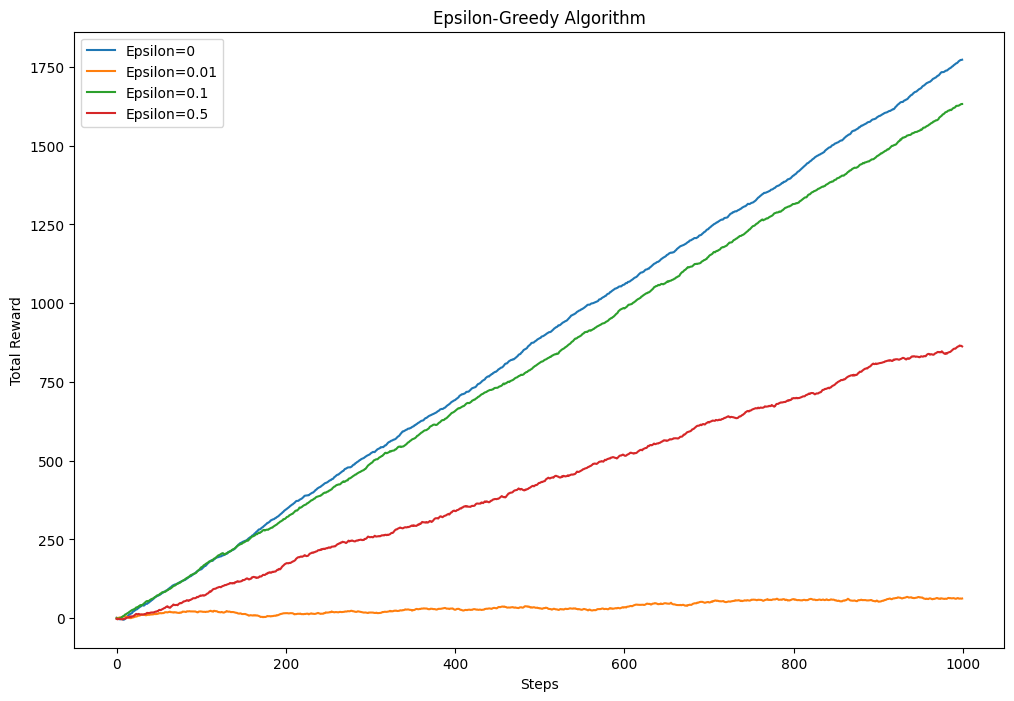

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(num_arms, true_rewards, num_steps, epsilon):
    # Initialize variables
    Q_values = np.zeros(num_arms)
    N_values = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    # Run the algorithm
    for _ in range(num_steps):
        if np.random.uniform(0, 1) < epsilon:
            # Explore: choose a random arm
            action = np.random.randint(0, num_arms)
        else:
            # Exploit: choose the arm with the highest Q-value
            action = np.argmax(Q_values)

        # Get the reward from the chosen arm
        reward = np.random.normal(true_rewards[action], 1)

        # Update Q-value and N-value
        N_values[action] += 1
        Q_values[action] += (reward - Q_values[action]) / N_values[action]

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

# Define the number of arms, true reward distribution, and number of steps
num_arms = 5
true_rewards = np.random.normal(0, 1, num_arms)
num_steps = 1000

# Experiment with different epsilon values
epsilons = [0, 0.01, 0.1, 0.5]
results = {}

for epsilon in epsilons:
    rewards = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon)
    results[epsilon] = rewards

# Plot the results
plt.figure(figsize=(12, 8))
for epsilon, rewards in results.items():
    plt.plot(rewards, label=f"Epsilon={epsilon}")
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.legend()
plt.title("Epsilon-Greedy Algorithm")
plt.show()


**UCB (Upper Confidence Bound)**

---



I Implemented a function similar to epsilon-greedy, but use UCB strategy to select arms, UCB balances exploration and exploitation based on an exploration parameter.Experiment with  exploration parameters 0.1, 0.5, 1, 2, 5 and compare its performance with epsilon-greedy.

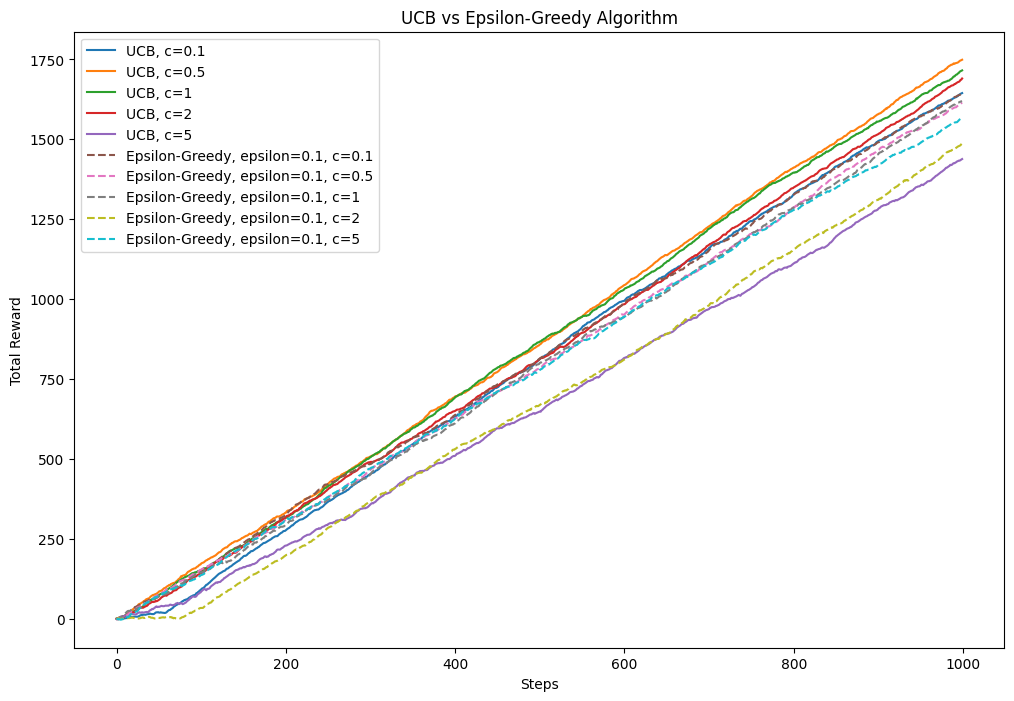

UCB Algorithm:
Exploration parameter (c): 0.1, Total reward: 1644.6671429943526
Exploration parameter (c): 0.5, Total reward: 1749.0699094435345
Exploration parameter (c): 1, Total reward: 1715.6898389824908
Exploration parameter (c): 2, Total reward: 1690.3444484837494
Exploration parameter (c): 5, Total reward: 1438.2556225168837

Epsilon-Greedy Algorithm:
Epsilon: 0.1, Total reward: 1644.4813462390846
Epsilon: 0.1, Total reward: 1614.4865250309829
Epsilon: 0.1, Total reward: 1619.2337546810024
Epsilon: 0.1, Total reward: 1487.405029137502
Epsilon: 0.1, Total reward: 1566.3108716532909


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ucb(num_arms, true_rewards, num_steps, c):
    Q_values = np.zeros(num_arms)
    N_values = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    for t in range(1, num_steps + 1):
        # Select arm with highest UCB value
        ucb_values = Q_values + c * np.sqrt(np.log(t) / (N_values + 1e-5))
        action = np.argmax(ucb_values)

        # Get reward from the chosen arm
        reward = np.random.normal(true_rewards[action], 1)

        # Update Q-value and N-value
        N_values[action] += 1
        Q_values[action] += (reward - Q_values[action]) / N_values[action]

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

def epsilon_greedy(num_arms, true_rewards, num_steps, epsilon):
    Q_values = np.zeros(num_arms)
    N_values = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    for _ in range(num_steps):
        if np.random.uniform(0, 1) < epsilon:
            # Explore: choose a random arm
            action = np.random.randint(0, num_arms)
        else:
            # Exploit: choose the arm with the highest Q-value
            action = np.argmax(Q_values)

        # Get reward from the chosen arm
        reward = np.random.normal(true_rewards[action], 1)

        # Update Q-value and N-value
        N_values[action] += 1
        Q_values[action] += (reward - Q_values[action]) / N_values[action]

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

# Define the number of arms, true reward distribution, and number of steps
num_arms = 5
true_rewards = np.random.normal(0, 1, num_arms)
num_steps = 1000

# Experiment with different exploration parameters
exploration_params = [0.1, 0.5, 1, 2, 5]
results_ucb = {}
results_epsilon_greedy = {}

for c in exploration_params:
    rewards_ucb = ucb(num_arms, true_rewards, num_steps, c)
    rewards_epsilon_greedy = epsilon_greedy(num_arms, true_rewards, num_steps, 0.1)
    results_ucb[c] = rewards_ucb
    results_epsilon_greedy[c] = rewards_epsilon_greedy

# Plot the results
plt.figure(figsize=(12, 8))
for c, rewards in results_ucb.items():
    plt.plot(rewards, label=f"UCB, c={c}")
for c, rewards in results_epsilon_greedy.items():
    plt.plot(rewards, label=f"Epsilon-Greedy, epsilon=0.1, c={c}", linestyle='--')
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.legend()
plt.title("UCB vs Epsilon-Greedy Algorithm")
plt.show()

# Analysis
print("UCB Algorithm:")
for c, rewards in results_ucb.items():
    print(f"Exploration parameter (c): {c}, Total reward: {rewards[-1]}")

print("\nEpsilon-Greedy Algorithm:")
for c, rewards in results_epsilon_greedy.items():
    print(f"Epsilon: 0.1, Total reward: {rewards[-1]}")


**Thompson Sampling**

---

 I Implemented a function specifically for Bernoulli bandits (binary rewards).
Useing Thompson Sampling, which maintains beliefs about each arm's success probability and displayed the total reward for the specified steps.



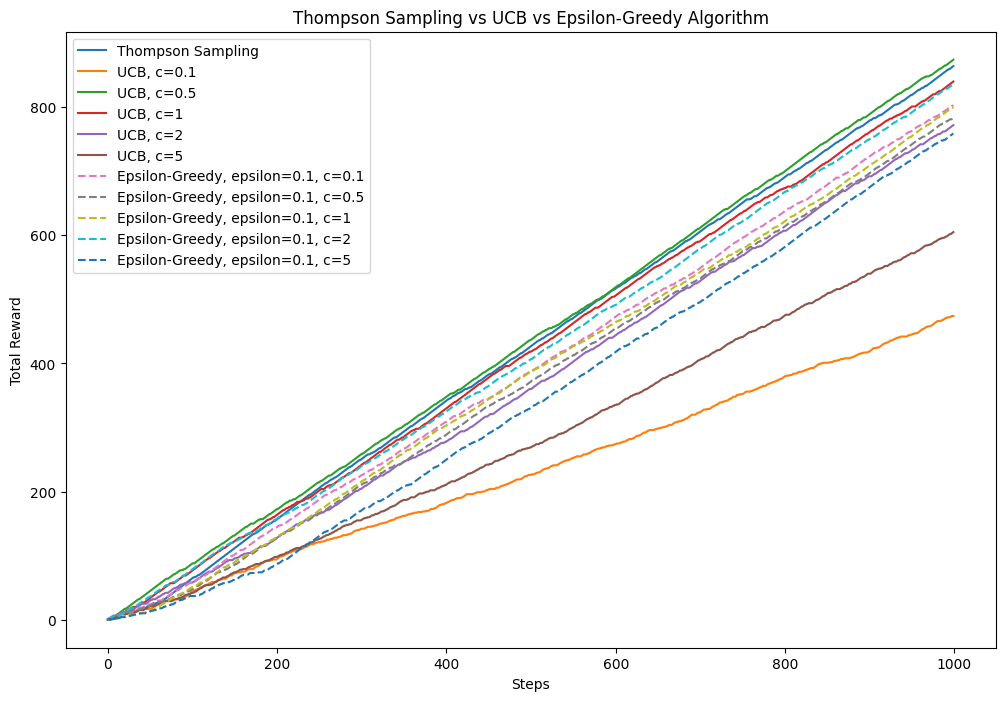

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling(num_arms, true_probs, num_steps):
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    for _ in range(num_steps):
        # Sample from the beta distribution for each arm
        samples = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(num_arms)]

        # Choose the arm with the highest sample
        action = np.argmax(samples)

        # Get reward from the chosen arm
        reward = np.random.binomial(1, true_probs[action])

        # Update successes and failures
        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

def ucb(num_arms, true_probs, num_steps, c):
    Q_values = np.zeros(num_arms)
    N_values = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    for t in range(1, num_steps + 1):
        # Select arm with highest UCB value
        ucb_values = Q_values + c * np.sqrt(np.log(t) / (N_values + 1e-5))
        action = np.argmax(ucb_values)

        # Get reward from the chosen arm
        reward = np.random.binomial(1, true_probs[action])

        # Update Q-value and N-value
        N_values[action] += 1
        Q_values[action] += (reward - Q_values[action]) / N_values[action]

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

def epsilon_greedy(num_arms, true_probs, num_steps, epsilon):
    Q_values = np.zeros(num_arms)
    N_values = np.zeros(num_arms)
    total_reward = 0
    rewards = []

    for _ in range(num_steps):
        if np.random.uniform(0, 1) < epsilon:
            # Explore: choose a random arm
            action = np.random.randint(0, num_arms)
        else:
            # Exploit: choose the arm with the highest Q-value
            action = np.argmax(Q_values)

        # Get reward from the chosen arm
        reward = np.random.binomial(1, true_probs[action])

        # Update Q-value and N-value
        N_values[action] += 1
        Q_values[action] += (reward - Q_values[action]) / N_values[action]

        # Update total reward
        total_reward += reward
        rewards.append(total_reward)

    return rewards

# Define the number of arms, true success probabilities, and number of steps
num_arms = 5
true_probs = np.random.rand(num_arms)
num_steps = 1000

# Experiment with different exploration parameters for UCB
c_values = [0.1, 0.5, 1, 2, 5]
results_thompson_sampling = thompson_sampling(num_arms, true_probs, num_steps)
results_ucb = {}
results_epsilon_greedy = {}

for c in c_values:
    rewards_ucb = ucb(num_arms, true_probs, num_steps, c)
    rewards_epsilon_greedy = epsilon_greedy(num_arms, true_probs, num_steps, 0.1)
    results_ucb[c] = rewards_ucb
    results_epsilon_greedy[c] = rewards_epsilon_greedy

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(results_thompson_sampling, label="Thompson Sampling")
for c, rewards in results_ucb.items():
    plt.plot(rewards, label=f"UCB, c={c}")
for c, rewards in results_epsilon_greedy.items():
    plt.plot(rewards, label=f"Epsilon-Greedy, epsilon=0.1, c={c}", linestyle='--')
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.legend()
plt.title("Thompson Sampling vs UCB vs Epsilon-Greedy Algorithm")
plt.show()
